In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Lars
from sklearn.linear_model import SGDRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

# import warnings
# warnings.filterwarnings("ignore")

In [58]:
automobile_df = pd.read_csv('datasets/auto-mpg-processed.csv')

automobile_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,age
0,23.8,4,151.0,85,2855,17.6,46
1,32.0,4,144.0,96,2665,13.9,42
2,25.0,4,90.0,71,2223,16.5,49
3,21.0,6,199.0,90,2648,15.0,54
4,22.0,4,140.0,72,2408,19.0,53


In [59]:
result_dict = {}

In [60]:
def build_model(regression_fn,                
                name_of_y_col, 
                names_of_x_cols, 
                dataset, 
                test_frac=0.2,
                preprocess_fn=None,
                show_plot_Y=False,
                show_plot_scatter=False):
    
    X = dataset[names_of_x_cols]
    Y = dataset[name_of_y_col]

    if preprocess_fn is not None:
        X = preprocess_fn(X)

    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=test_frac)
    
    model = regression_fn(x_train, y_train)
    
    y_pred = model.predict(x_test)
    
    print("Training_score : " , model.score(x_train, y_train))
    print("Test_score : ", r2_score(y_test, y_pred))

    if show_plot_Y == True:
        fig, ax = plt.subplots(figsize=(12, 8))
        
        plt.plot(y_pred, label='Predicted')
        plt.plot(y_test.values, label='Actual')
        
        plt.ylabel(name_of_y_col)

        plt.legend()
        plt.show()

    if show_plot_scatter == True:
        fig, ax = plt.subplots(figsize=(12, 8))
        
        plt.scatter(x_test, y_test)
        plt.plot(x_test, y_pred, 'r')
        
        plt.legend(['Predicted line','Observed data'])
        plt.show()
    
    return {
            'training_score': model.score(x_train, y_train),
            'test_score': r2_score(y_test, y_pred)
           }     

In [61]:
def compare_results():
    for key in result_dict:
        print('Regression: ', key)
        print('Training score', result_dict[key]['training_score'])
        print('Test score', result_dict[key]['test_score'])
        print()

In [62]:
def linear_reg(x_train, y_train):
    model = LinearRegression()
    model.fit(x_train, y_train)
    
    return model

Training_score :  0.6978056645262238
Test_score :  0.6721065813322689


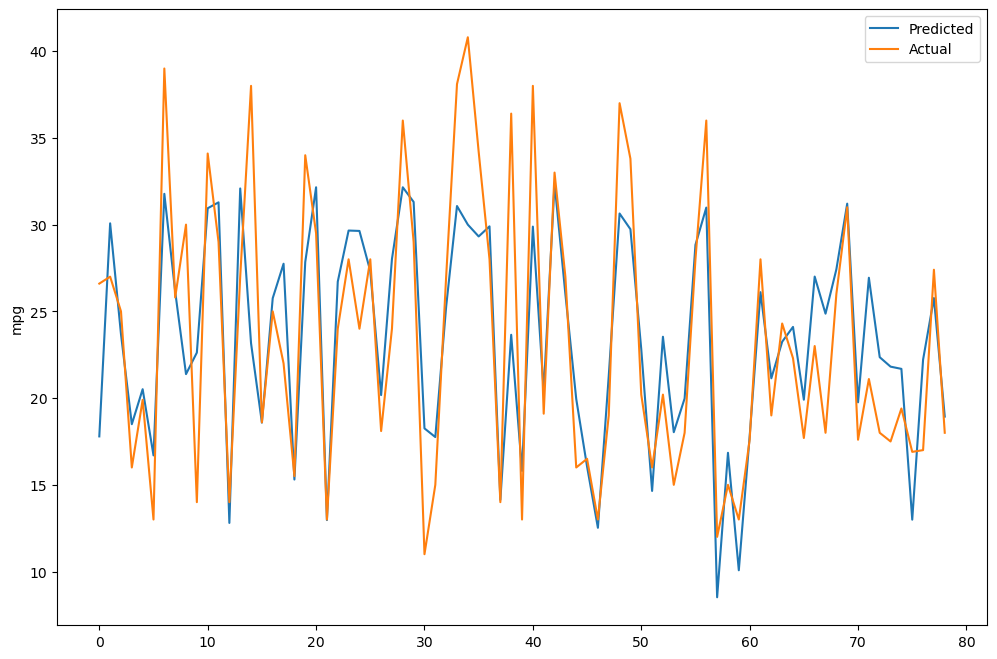

In [63]:
result_dict['mpg ~ single_linear'] = build_model(linear_reg,
                                                 'mpg',
                                                ['weight'],
                                                  automobile_df,
                                                  show_plot_Y=True)

Training_score :  0.819021775446485
Test_score :  0.7533349188846532


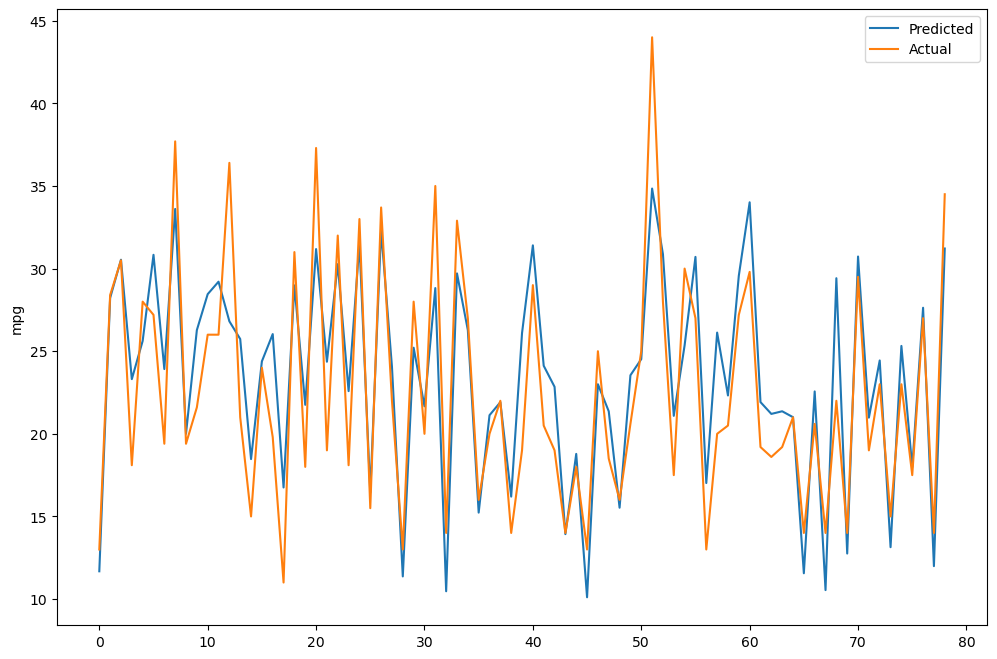

In [64]:
result_dict['mpg ~ kitchen_sink_linear'] = build_model(linear_reg,
                                                      'mpg',
                                                     ['cylinders',
                                                      'displacement',
                                                      'horsepower',
                                                      'weight',
                                                      'acceleration',
                                                     'age'],
                                                      automobile_df,
                                                      show_plot_Y=True)

Training_score :  0.7234561690717841
Test_score :  0.6017436018530045


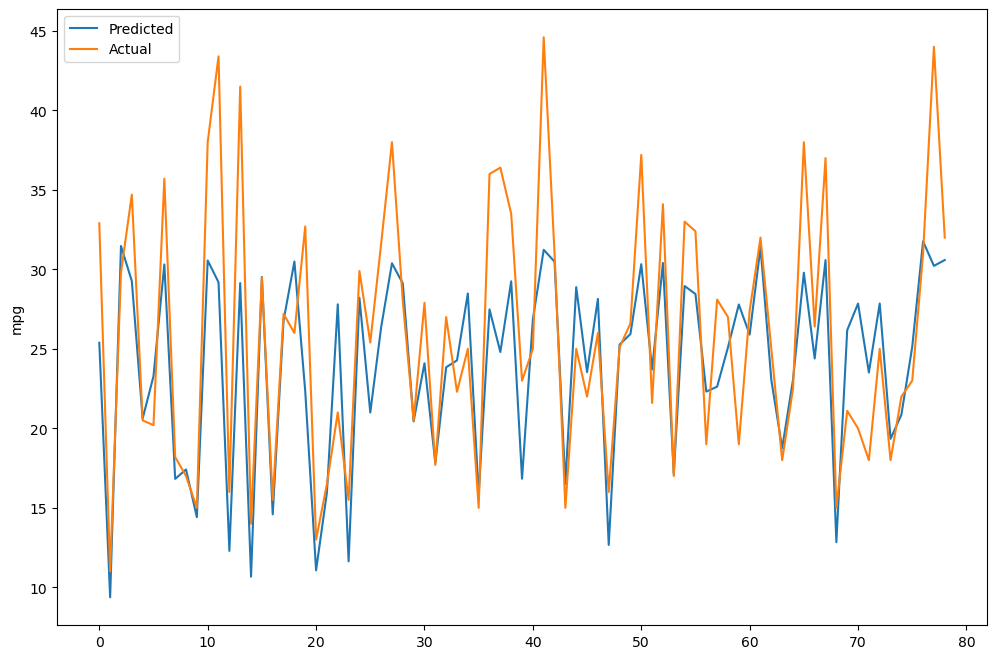

In [65]:
result_dict['mpg ~ parsimonius_linear'] = build_model(linear_reg,
                                                      'mpg',
                                                    ['horsepower',
                                                     'weight'],
                                                      automobile_df,
                                                      show_plot_Y=True)

In [66]:
compare_results()

Regression:  mpg ~ single_linear
Training score 0.6978056645262238
Test score 0.6721065813322689

Regression:  mpg ~ kitchen_sink_linear
Training score 0.819021775446485
Test score 0.7533349188846532

Regression:  mpg ~ parsimonius_linear
Training score 0.7234561690717841
Test score 0.6017436018530045



In [67]:
def lasso_reg(x_train, y_train, alpha=0.5):
    model = Lasso(alpha=alpha)
    model.fit(x_train, y_train)
    
    return model

Training_score :  0.7109505052841529
Test_score :  0.6846276993002851


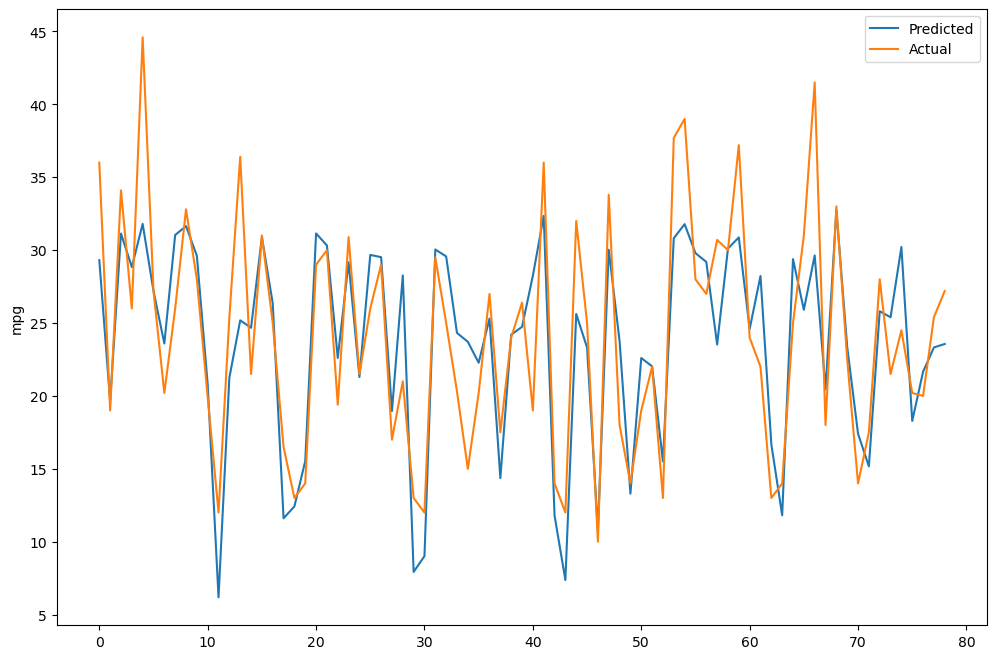

In [68]:
result_dict['mpg ~ kitchen_sink_lasso'] = build_model(lasso_reg,
                                                     'mpg',
                                                    ['cylinders',
                                                     'displacement',
                                                     'horsepower',
                                                     'weight',
                                                     'acceleration'],
                                                      automobile_df,
                                                      show_plot_Y=True)

In [69]:
compare_results()

Regression:  mpg ~ single_linear
Training score 0.6978056645262238
Test score 0.6721065813322689

Regression:  mpg ~ kitchen_sink_linear
Training score 0.819021775446485
Test score 0.7533349188846532

Regression:  mpg ~ parsimonius_linear
Training score 0.7234561690717841
Test score 0.6017436018530045

Regression:  mpg ~ kitchen_sink_lasso
Training score 0.7109505052841529
Test score 0.6846276993002851



In [70]:
def ridge_reg(x_train, y_train, alpha=0.5, normalize=True):
    model = Ridge(alpha=alpha)
    model.fit(x_train, y_train)
    
    return model

Training_score :  0.7069894984615568
Test_score :  0.6887110381962209


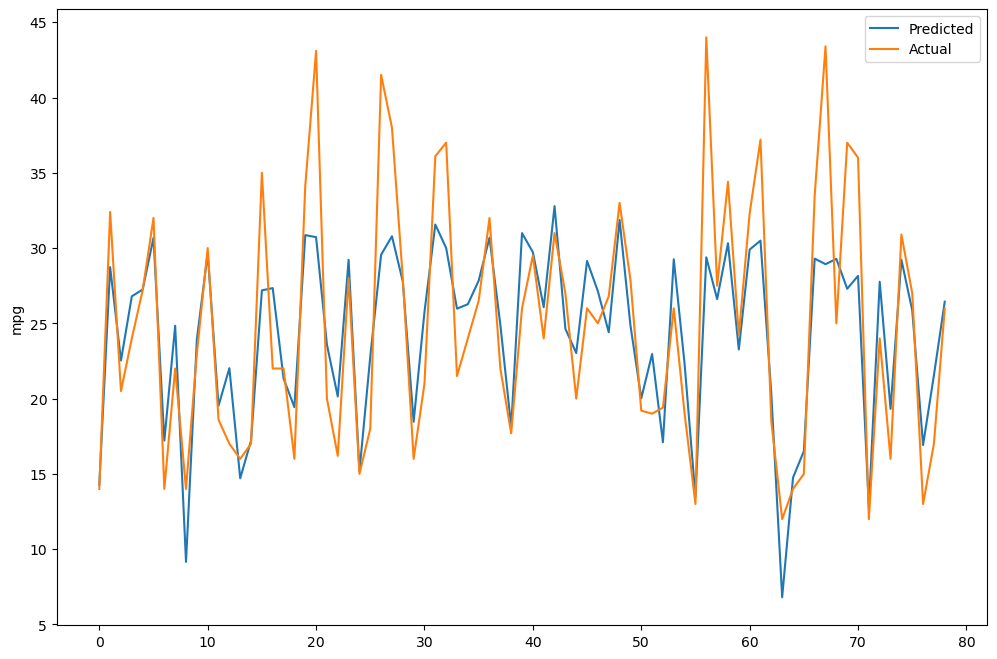

In [71]:
result_dict['mpg ~ kitchen_sink_ridge'] = build_model(ridge_reg,
                                                      'mpg',
                                                     ['cylinders',
                                                      'displacement',
                                                      'horsepower',
                                                      'weight',
                                                      'acceleration'],
                                                       automobile_df,
                                                       show_plot_Y=True)

In [72]:
compare_results()

Regression:  mpg ~ single_linear
Training score 0.6978056645262238
Test score 0.6721065813322689

Regression:  mpg ~ kitchen_sink_linear
Training score 0.819021775446485
Test score 0.7533349188846532

Regression:  mpg ~ parsimonius_linear
Training score 0.7234561690717841
Test score 0.6017436018530045

Regression:  mpg ~ kitchen_sink_lasso
Training score 0.7109505052841529
Test score 0.6846276993002851

Regression:  mpg ~ kitchen_sink_ridge
Training score 0.7069894984615568
Test score 0.6887110381962209



In [73]:
def elastic_net_reg(x_train, y_train, alpha=1, l1_ratio=0.5, 
                    normalize=False, max_iter=100000, warm_start=True, equivalent_to="Elastic Net"):

    print("Equivalent to:", equivalent_to)
    
    model = ElasticNet(alpha=alpha, l1_ratio=l1_ratio, 
                       max_iter=max_iter, warm_start=warm_start)
    model.fit(x_train, y_train)

    return model

Equivalent to: OLS
Training_score :  0.7020717824561267
Test_score :  0.7281026372986459


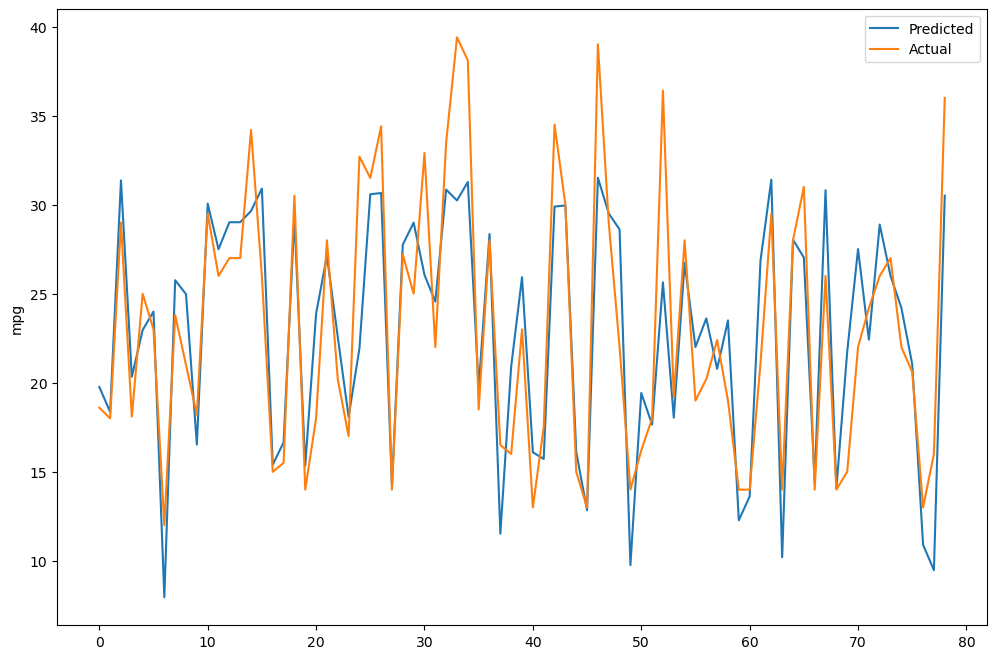

In [74]:
from functools import partial

## This generates a warning which says will not converge
result_dict['mpg ~ kitchen_sink_elastic_net_ols'] = build_model(partial(elastic_net_reg, 
                                                                        alpha=0, equivalent_to="OLS"),
                                                               'mpg',
                                                              ['cylinders',
                                                               'displacement',
                                                               'horsepower',
                                                               'weight',
                                                               'acceleration'],
                                                                automobile_df,
                                                                show_plot_Y=True)

Equivalent to: Lasso
Training_score :  0.7235630035623644
Test_score :  0.6346273809104861


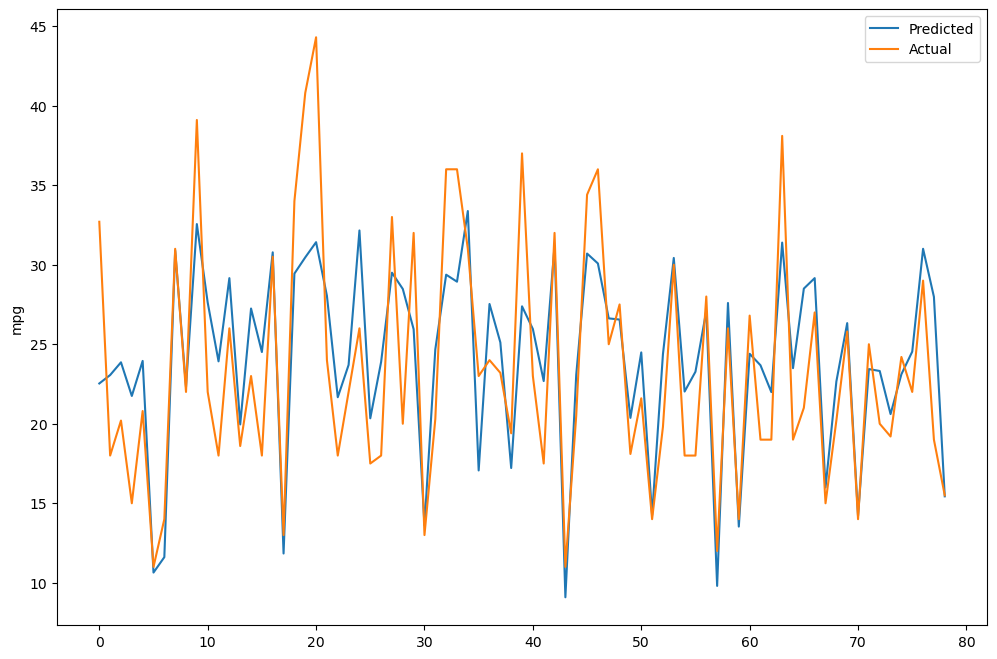

In [75]:
result_dict['mpg ~ kitchen_sink_elastic_net_lasso'] = build_model(partial(elastic_net_reg, alpha=1, 
                                                                    l1_ratio=0, equivalent_to="Lasso"),
                                                                  'mpg',
                                                                 ['cylinders',
                                                                  'displacement',
                                                                  'horsepower',
                                                                  'weight',
                                                                  'acceleration'],
                                                                   automobile_df,
                                                                   show_plot_Y=True)

Equivalent to: Ridge
Training_score :  0.7092817577481058
Test_score :  0.6960463825039527


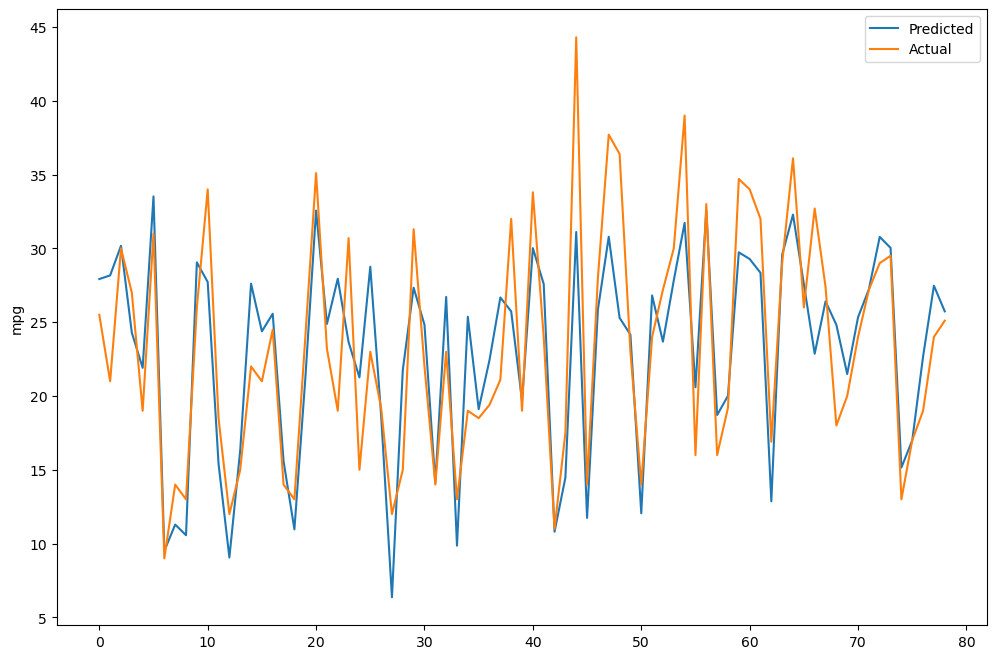

In [76]:
result_dict['mpg ~ kitchen_sink_elastic_net_ridge'] = build_model(partial(elastic_net_reg, alpha=1, 
                                                                    l1_ratio=1, equivalent_to="Ridge"),
                                                                  'mpg',
                                                                 ['cylinders',
                                                                  'displacement',
                                                                  'horsepower',
                                                                  'weight',
                                                                  'acceleration'],
                                                                   automobile_df,
                                                                   show_plot_Y=True)

Equivalent to: Elastic Net
Training_score :  0.6996550066577483
Test_score :  0.7329168481153407


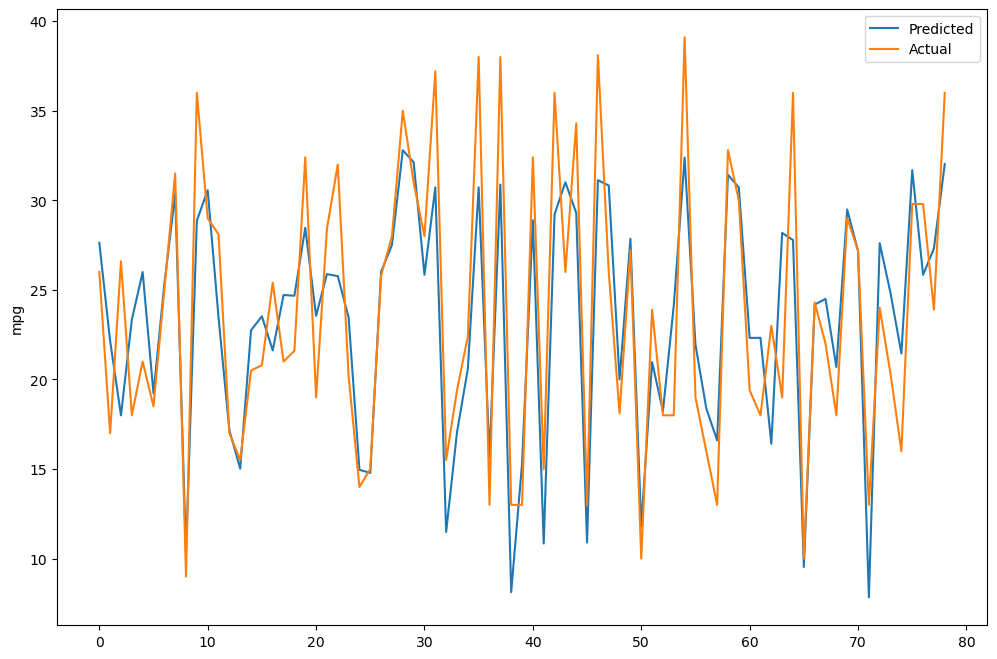

In [77]:
result_dict['mpg ~ kitchen_sink_elastic_net'] = build_model(partial(elastic_net_reg, alpha=1, l1_ratio=0.5),
                                                            'mpg',
                                                          [ 'cylinders',
                                                            'displacement',
                                                            'horsepower',
                                                            'weight',
                                                            'acceleration'],
                                                            automobile_df,
                                                            show_plot_Y=True)

In [78]:
compare_results()

Regression:  mpg ~ single_linear
Training score 0.6978056645262238
Test score 0.6721065813322689

Regression:  mpg ~ kitchen_sink_linear
Training score 0.819021775446485
Test score 0.7533349188846532

Regression:  mpg ~ parsimonius_linear
Training score 0.7234561690717841
Test score 0.6017436018530045

Regression:  mpg ~ kitchen_sink_lasso
Training score 0.7109505052841529
Test score 0.6846276993002851

Regression:  mpg ~ kitchen_sink_ridge
Training score 0.7069894984615568
Test score 0.6887110381962209

Regression:  mpg ~ kitchen_sink_elastic_net_ols
Training score 0.7020717824561267
Test score 0.7281026372986459

Regression:  mpg ~ kitchen_sink_elastic_net_lasso
Training score 0.7235630035623644
Test score 0.6346273809104861

Regression:  mpg ~ kitchen_sink_elastic_net_ridge
Training score 0.7092817577481058
Test score 0.6960463825039527

Regression:  mpg ~ kitchen_sink_elastic_net
Training score 0.6996550066577483
Test score 0.7329168481153407



### For SVR regression with larger datasets this alternate implementations is preferred

https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVR.html#sklearn.svm.LinearSVR

* Uses a different library for implementation
* More flexibility with choice of penalties
* Scales to larger datasets

In [95]:
def svr_reg(x_train, y_train, kernel='linear', epsilon=0.05, C=0.3):
    model = SVR(kernel=kernel, epsilon=epsilon, C=C)
    model.fit(x_train,y_train)
    
    return model

Training_score :  0.6982848886047717
Test_score :  0.6460979420606212


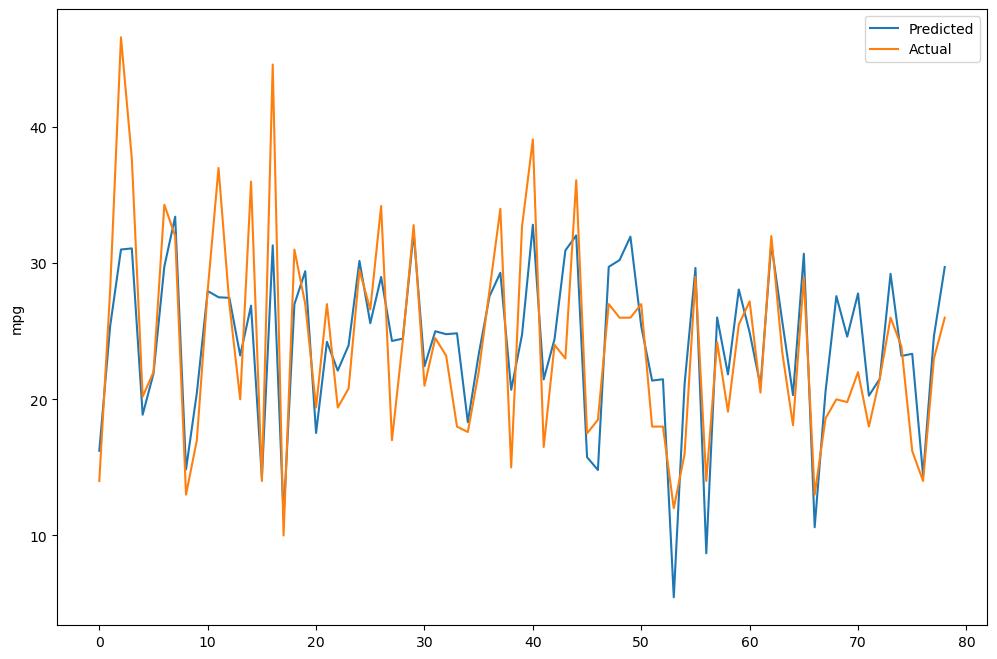

In [96]:
result_dict['mpg ~ kitchen_sink_svr'] = build_model(svr_reg,
                                                    'mpg',
                                                   ['cylinders',
                                                    'displacement',
                                                    'horsepower',
                                                    'weight',
                                                    'acceleration'],
                                                     automobile_df,
                                                     show_plot_Y=True)

In [98]:
compare_results()

Regression:  mpg ~ single_linear
Training score 0.6978056645262238
Test score 0.6721065813322689

Regression:  mpg ~ kitchen_sink_linear
Training score 0.819021775446485
Test score 0.7533349188846532

Regression:  mpg ~ parsimonius_linear
Training score 0.7234561690717841
Test score 0.6017436018530045

Regression:  mpg ~ kitchen_sink_lasso
Training score 0.7109505052841529
Test score 0.6846276993002851

Regression:  mpg ~ kitchen_sink_ridge
Training score 0.7069894984615568
Test score 0.6887110381962209

Regression:  mpg ~ kitchen_sink_elastic_net_ols
Training score 0.7020717824561267
Test score 0.7281026372986459

Regression:  mpg ~ kitchen_sink_elastic_net_lasso
Training score 0.7235630035623644
Test score 0.6346273809104861

Regression:  mpg ~ kitchen_sink_elastic_net_ridge
Training score 0.7092817577481058
Test score 0.6960463825039527

Regression:  mpg ~ kitchen_sink_elastic_net
Training score 0.6996550066577483
Test score 0.7329168481153407

Regression:  mpg ~ kitchen_sink_svr
Tr

In [99]:
def kneighbors_reg(x_train, y_train, n_neighbors=10):
    model = KNeighborsRegressor(n_neighbors=n_neighbors)
    model.fit(x_train, y_train)
    
    return model

Training_score :  0.7534272336483582
Test_score :  0.7254976002706119


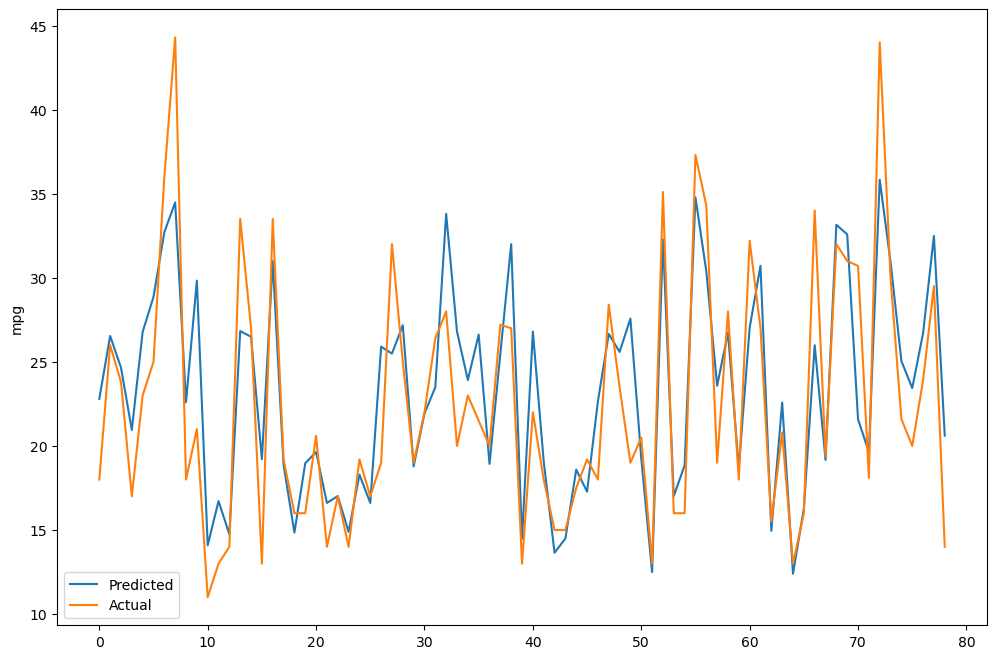

In [100]:
result_dict['mpg ~ kitchen_sink_kneighbors'] = build_model(kneighbors_reg,
                                                           'mpg',
                                                          ['cylinders',
                                                           'displacement',
                                                           'horsepower',
                                                           'weight',
                                                           'acceleration'],
                                                           automobile_df,
                                                           show_plot_Y=True)

In [84]:
compare_results()

Regression:  mpg ~ single_linear
Training score 0.6978056645262238
Test score 0.6721065813322689

Regression:  mpg ~ kitchen_sink_linear
Training score 0.819021775446485
Test score 0.7533349188846532

Regression:  mpg ~ parsimonius_linear
Training score 0.7234561690717841
Test score 0.6017436018530045

Regression:  mpg ~ kitchen_sink_lasso
Training score 0.7109505052841529
Test score 0.6846276993002851

Regression:  mpg ~ kitchen_sink_ridge
Training score 0.7069894984615568
Test score 0.6887110381962209

Regression:  mpg ~ kitchen_sink_elastic_net_ols
Training score 0.7020717824561267
Test score 0.7281026372986459

Regression:  mpg ~ kitchen_sink_elastic_net_lasso
Training score 0.7235630035623644
Test score 0.6346273809104861

Regression:  mpg ~ kitchen_sink_elastic_net_ridge
Training score 0.7092817577481058
Test score 0.6960463825039527

Regression:  mpg ~ kitchen_sink_elastic_net
Training score 0.6996550066577483
Test score 0.7329168481153407

Regression:  mpg ~ kitchen_sink_svr
Tr

In [85]:
def apply_standard_scaler(x):
    scaler = StandardScaler()
    scaler.fit(x)  

    return scaler.transform(x)

In [101]:
def sgd_reg(x_train, y_train, max_iter=10000, tol=1e-3):
    model = SGDRegressor(max_iter=max_iter, tol=tol)
    model.fit(x_train, y_train)
    
    return model

Training_score :  0.7011303336045513
Test_score :  0.7189732287351611


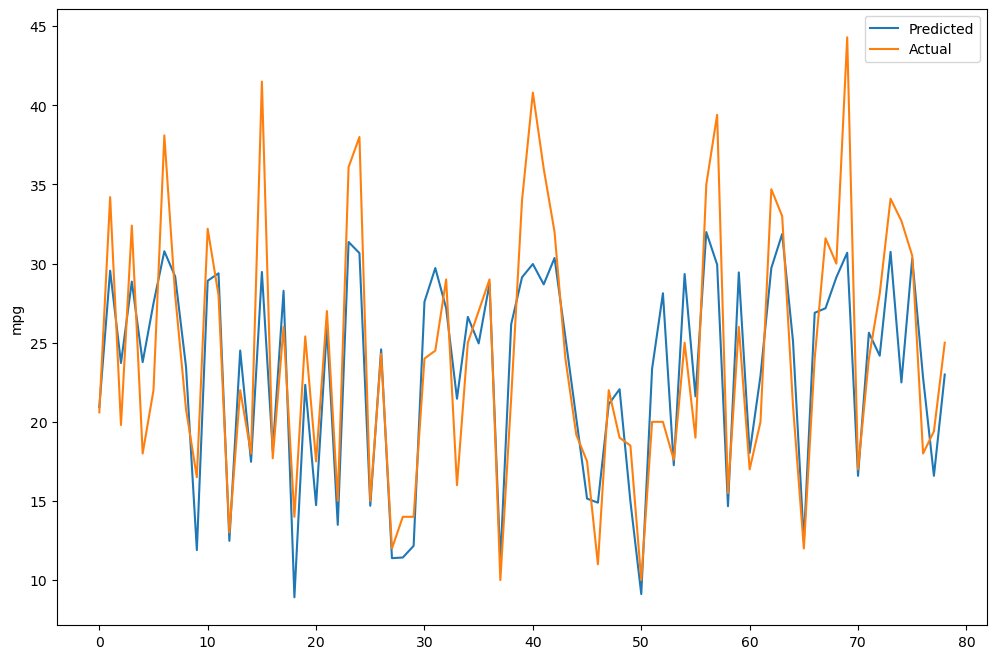

In [102]:
result_dict['mpg ~ kitchen_sink_sgd'] = build_model(sgd_reg,
                                                   'mpg',
                                                  ['cylinders',
                                                   'displacement',
                                                   'horsepower',
                                                   'weight',
                                                   'acceleration'],
                                                    automobile_df,
                                                    show_plot_Y=True,
                                                    preprocess_fn=apply_standard_scaler)

In [103]:
compare_results()

Regression:  mpg ~ single_linear
Training score 0.6978056645262238
Test score 0.6721065813322689

Regression:  mpg ~ kitchen_sink_linear
Training score 0.819021775446485
Test score 0.7533349188846532

Regression:  mpg ~ parsimonius_linear
Training score 0.7234561690717841
Test score 0.6017436018530045

Regression:  mpg ~ kitchen_sink_lasso
Training score 0.7109505052841529
Test score 0.6846276993002851

Regression:  mpg ~ kitchen_sink_ridge
Training score 0.7069894984615568
Test score 0.6887110381962209

Regression:  mpg ~ kitchen_sink_elastic_net_ols
Training score 0.7020717824561267
Test score 0.7281026372986459

Regression:  mpg ~ kitchen_sink_elastic_net_lasso
Training score 0.7235630035623644
Test score 0.6346273809104861

Regression:  mpg ~ kitchen_sink_elastic_net_ridge
Training score 0.7092817577481058
Test score 0.6960463825039527

Regression:  mpg ~ kitchen_sink_elastic_net
Training score 0.6996550066577483
Test score 0.7329168481153407

Regression:  mpg ~ kitchen_sink_svr
Tr

In [104]:
def decision_tree_reg(x_train, y_train, max_depth=2):
    model = DecisionTreeRegressor(max_depth=max_depth)
    model.fit(x_train, y_train)
    
    return model

Training_score :  0.7584709097321514
Test_score :  0.6286998162714363


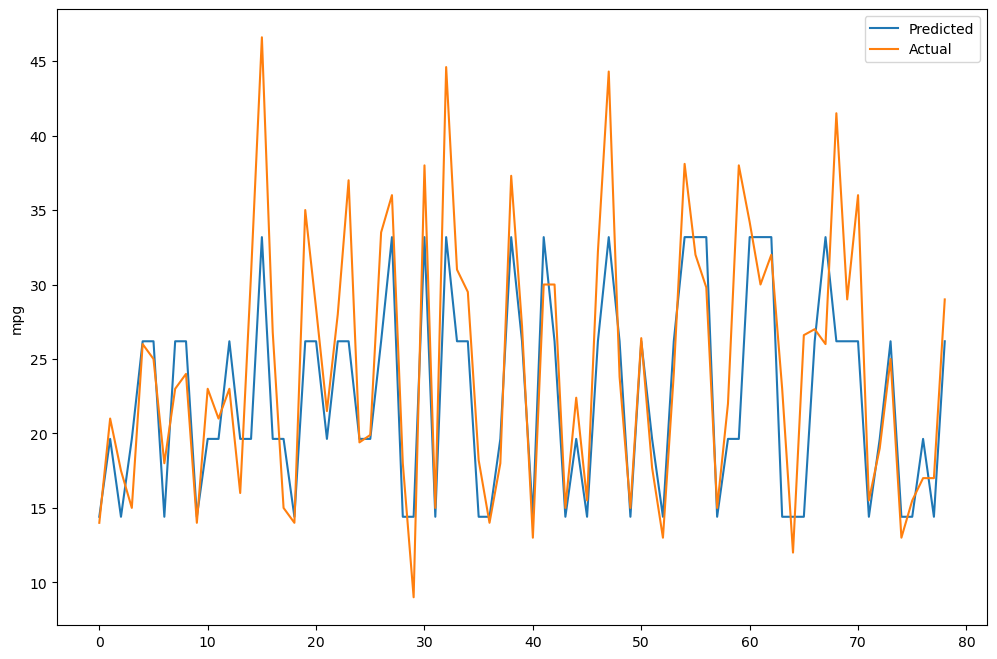

In [105]:
result_dict['mpg ~ kitchen_sink_decision_tree'] = build_model(decision_tree_reg,
                                                             'mpg',
                                                            ['cylinders',
                                                             'displacement',
                                                             'horsepower',
                                                             'weight',
                                                             'acceleration'],
                                                              automobile_df,
                                                              show_plot_Y=True)

In [91]:
compare_results()

Regression:  mpg ~ single_linear
Training score 0.6978056645262238
Test score 0.6721065813322689

Regression:  mpg ~ kitchen_sink_linear
Training score 0.819021775446485
Test score 0.7533349188846532

Regression:  mpg ~ parsimonius_linear
Training score 0.7234561690717841
Test score 0.6017436018530045

Regression:  mpg ~ kitchen_sink_lasso
Training score 0.7109505052841529
Test score 0.6846276993002851

Regression:  mpg ~ kitchen_sink_ridge
Training score 0.7069894984615568
Test score 0.6887110381962209

Regression:  mpg ~ kitchen_sink_elastic_net_ols
Training score 0.7020717824561267
Test score 0.7281026372986459

Regression:  mpg ~ kitchen_sink_elastic_net_lasso
Training score 0.7235630035623644
Test score 0.6346273809104861

Regression:  mpg ~ kitchen_sink_elastic_net_ridge
Training score 0.7092817577481058
Test score 0.6960463825039527

Regression:  mpg ~ kitchen_sink_elastic_net
Training score 0.6996550066577483
Test score 0.7329168481153407

Regression:  mpg ~ kitchen_sink_svr
Tr

In [92]:
def lars_reg(x_train, y_train, n_nonzero_coefs=4):
    model = Lars(n_nonzero_coefs=n_nonzero_coefs)
    model.fit(x_train, y_train)
    
    return model

Training_score :  0.6911155864704062
Test_score :  0.7654013435909031


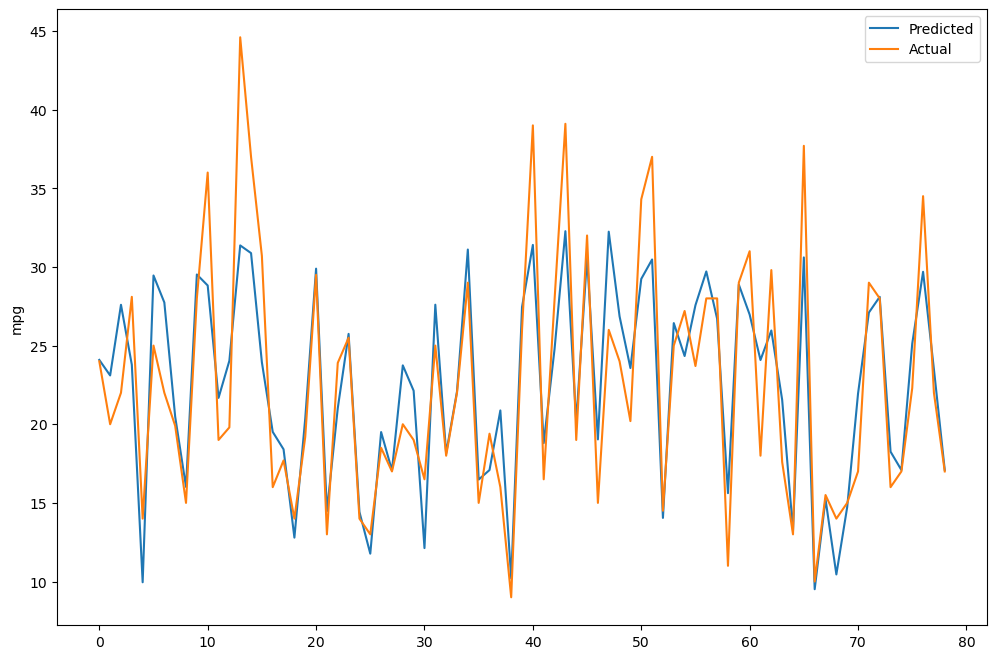

In [93]:
result_dict['mpg ~ kitchen_sink_lars'] = build_model(lars_reg,
                                                    'mpg',
                                                   ['cylinders',
                                                    'displacement',
                                                    'horsepower',
                                                    'weight',
                                                    'acceleration'],
                                                     automobile_df,
                                                     show_plot_Y=True)

In [94]:
compare_results()

Regression:  mpg ~ single_linear
Training score 0.6978056645262238
Test score 0.6721065813322689

Regression:  mpg ~ kitchen_sink_linear
Training score 0.819021775446485
Test score 0.7533349188846532

Regression:  mpg ~ parsimonius_linear
Training score 0.7234561690717841
Test score 0.6017436018530045

Regression:  mpg ~ kitchen_sink_lasso
Training score 0.7109505052841529
Test score 0.6846276993002851

Regression:  mpg ~ kitchen_sink_ridge
Training score 0.7069894984615568
Test score 0.6887110381962209

Regression:  mpg ~ kitchen_sink_elastic_net_ols
Training score 0.7020717824561267
Test score 0.7281026372986459

Regression:  mpg ~ kitchen_sink_elastic_net_lasso
Training score 0.7235630035623644
Test score 0.6346273809104861

Regression:  mpg ~ kitchen_sink_elastic_net_ridge
Training score 0.7092817577481058
Test score 0.6960463825039527

Regression:  mpg ~ kitchen_sink_elastic_net
Training score 0.6996550066577483
Test score 0.7329168481153407

Regression:  mpg ~ kitchen_sink_svr
Tr